# Ubisoft R6 Siege (2017) - Analysis of the fairness of the game (Attackers vs Defenders).

### Table of Contents

* [Introduction](#chapter1)


* [A) Cleaning & Peparation](#chapter2)
    * [Installing and loading packages](#section_2_1)
    * [Importing the data](#section_2_2)
    * [Cleaning each column](#section_2_3) 
        * [Dateid column: converting from integer to date (with the ymd format) and renaming the column](#section_2_3_1)
        * [Gamemode column: dropping a useless part of the string](#section_2_3_2)
        * [Mapname column: all good](#section_2_3_3)
        * [Skillrank column: giving an order to the different skillranks](#section_2_3_4)
        * [Role column: all good](#section_2_3_5)
        * [Operator column: all good](#section_2_3_6)
        * [Numeric columns (nbwins, nbkills, nbdeaths, nbpicks): checking for out of range numeric data](#section_2_3_7)
    * [Checking for missing data](#section_2_4)      


* [B) Analysis](#chapter3)
    * [Skillranks](#section_3_1)
        * [Was the probability of winning for the attackers and defenders the same for the different skillranks?](#section_3_1_1)
        * [What was the most played skillrank?](#section_3_1_2)
    * [Maps](#section_3_2)
        * [Was the probability of winning for the attackers and defenders the same for the different maps? (Skillrank: GOLD)](#section_3_2_1)
        * [Did the player have the same probability of playing the different maps? ](#section_3_2_2)
        * [Which maps were the best for the attackers?](#section_3_2_3)
        * [Which maps were the best for the defenders?](#section_3_2_4)
    * [Game modes](#section_3_3)
        * [Was the probability of winning for the attackers and defenders the same for the different game modes? (Skillrank: GOLD. Map: YACHT)](#section_3_3_1)
        * [Did the player have the same probability of playing the different game modes? ](#section_3_3_2)
        * [Which game modes were the best for the attackers?](#section_3_3_3)
        * [Which game modes were the best for the defenders?](#section_3_3_4)
    * [Objective locations](#section_3_4)
        * [Was the probability of winning for the attackers and defenders the same for the different objective locations? (Skillrank: GOLD. Map: YACHT. Game mode: AREA.)](#section_3_4_1)
        * [Did the player have the same probability of playing the different objective locations? ](#section_3_4_2)
        * [Which objective locations were the best for the attackers?](#section_3_4_3)
        * [Which objective locations were the best for the defenders?](#section_3_4_4)


* [Conclusion](#chapter4)



## Introduction <a class="anchor" id="chapter1"></a>

The main goal of this project is to practice my R skills on data from a Ubisoft game called "Tom Clancy's Rainbow Six Siege" or "R6 Siege" (Version: 2017).

This game is an online tactical shooting video game. Players play in teams of 5 against 5, attackers and defenders. They play on different maps and in different game modes such as rescuing a hostage, defusing a bomb and taking over an objective in a room. The objective location for a given map also changes from game to game to give players even more possible game configurations. (More information on: https://en.wikipedia.org/wiki/Tom_Clancy%27s_Rainbow_Six_Siege.)



**The objectives of this analysis are:**  
   - To see whether or not the game was fair for attackers and defenders (= same probability of winning).  
   - If not, to see which configurations (maps, game modes, objective locations) gave an advantage to the attackers/defenders.

To do this, we will compare the attacker/defender's probability of winning for the different game configurations that the player might play in R6 Siege 2017. In other words, we will analyse their overall probability of winning for each skill rank, and then their probability of winning for the different maps, game modes and objective locations. In order to keep this analysis and report relatively short, we will only take one example each time we dive deeper into our analysis: a specific skill rank to study maps, then a specific map to study game modes, and finally, a specific game mode to study objective locations. 

About the data:

There is only one dataset of R6 Siege data from "2017-02-10" to "2017-05-15" (in csv format) given by Ubisoft on this article: "Introduction to the Data Peek: Velvet Shell Statistics - Ubisoft" (https://www.ubisoft.com/en-us/game/rainbow-six/siege/news-pdates/2fQ8bGRr6SlS7B4u5jpVt1/introduction-to-the-data-peek-velvet-shell-statistics) .
I want to thank Ubisoft for that. Nevertheless, this article says that this is the first data spike of a series but after this one, it's impossible to find more data on the game. That's too bad. And that's why I'm working on the 2017 data.

## A) Cleaning & Preparation <a class="anchor" id="chapter2"></a>   

### 1 - Installing and loading packages:<a class="anchor" id="section_2_1"></a>

In [1]:
install.packages("tidyverse")
install.packages("scales")
install.packages("waffle")
library(tidyverse)
library(lubridate)
library(scales)
library(waffle) 

Installation du package dans 'C:/Users/Tristan/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tristan\AppData\Local\Temp\RtmpctZTBV\downloaded_packages


Installation du package dans 'C:/Users/Tristan/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tristan\AppData\Local\Temp\RtmpctZTBV\downloaded_packages


Installation du package dans 'C:/Users/Tristan/Documents/R/win-library/4.1'
(car 'lib' n'est pas spécifié)



package 'waffle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tristan\AppData\Local\Temp\RtmpctZTBV\downloaded_packages


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attachement du package : 'lubridate'


Les objets suivants sont masqués depuis 'package:base':

    date, intersect, setdiff, union



Attachement du package : 'scales'


L'objet suivant est masqué depuis 'package:purrr':

    discard


L'objet suivant est masqué depuis 'package:readr':

    col_factor




### 2- Importing the data:<a class="anchor" id="section_2_2"></a>

After importing the file the first time, we discovered by analysing its structure with str(), that some modifications had to be made to make it easier for us to manipulate the data, to reduce the execution time (because there is a lot of data) and to help us later in our analysis. So we decided to reimport the file using col_types to directly define the data type of each column:

Let's:
 - import the file (it is a .csv file but the delimiter is actually ";", so we will use read_delim() from readr). 
 - convert character to factor (using col_types). 
 - filter only the PS4 (our analysis will be only on the PS4).  
 - remove the column "platform" because we only have PS4 now.  

In [2]:
objectives <- read_delim("C:/Users/Tristan/Documents/DATA/R6 data/dataDump_s5_summary_objectives.csv", delim =';',  col_types ="fiffffffiiii")

objectives <- objectives %>%
  filter(platform == "PS4")

objectives <- select(objectives, -1)

head(objectives, n=3)

dateid,gamemode,mapname,objectivelocation,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
20170210,PvP <U+0096> BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,G.E.O.-JACKAL,3,2,1,3
20170210,PvP <U+0096> BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GIGN-TWITCH,3,2,4,7
20170210,PvP <U+0096> BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GSG9-IQ,3,1,2,3


### 3 - Cleaning each column: <a class="anchor" id="section_2_3"></a>

#### 1) Dateid column: converting from integer to date (with the ymd format) and renaming the column. <a class="anchor" id="section_2_3_1"></a>

In [3]:
str(objectives)

tibble [3,300,328 x 11] (S3: tbl_df/tbl/data.frame)
 $ dateid           : int [1:3300328] 20170210 20170210 20170210 20170210 20170210 20170210 20170210 20170210 20170210 20170210 ...
 $ gamemode         : Factor w/ 3 levels "PvP \u0096 BOMB",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mapname          : Factor w/ 16 levels "BANK","BARTLETT U.",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ objectivelocation: Factor w/ 142 levels "EXECUTIVE LOUNGE / CEO OFFICE",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ skillrank        : Factor w/ 7 levels "Bronze","Copper",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ role             : Factor w/ 2 levels "Attacker","Defender": 1 1 1 1 1 1 1 1 1 1 ...
 $ operator         : Factor w/ 35 levels "G.E.O.-JACKAL",..: 1 21 3 22 23 5 6 7 8 9 ...
 $ nbwins           : int [1:3300328] 3 3 3 3 3 1 3 2 0 5 ...
 $ nbkills          : int [1:3300328] 2 2 1 3 4 1 3 3 1 6 ...
 $ nbdeaths         : int [1:3300328] 1 4 2 0 5 2 3 0 1 4 ...
 $ nbpicks          : int [1:3300328] 3 7 3 3 5 2 4 2 1 8 ...


In [4]:
head(count(objectives, dateid), n=5)

dateid,n
<int>,<int>
20170210,30716
20170211,34002
20170212,35121
20170213,33797
20170214,33831


We can see in str() that dateid is an integer and with head() that it has the format ymd (ex: 20170213).

Let's convert it to a date data type (while keeping this format of date).
We will also change its name for date:

In [5]:
objectives <- objectives %>%
    mutate(dateid = ymd(dateid)) %>%
    rename(date = dateid)

head(objectives, n=3)    

date,gamemode,mapname,objectivelocation,skillrank,role,operator,nbwins,nbkills,nbdeaths,nbpicks
<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>
2017-02-10,PvP <U+0096> BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,G.E.O.-JACKAL,3,2,1,3
2017-02-10,PvP <U+0096> BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GIGN-TWITCH,3,2,4,7
2017-02-10,PvP <U+0096> BOMB,BANK,EXECUTIVE LOUNGE / CEO OFFICE,Bronze,Attacker,GSG9-IQ,3,1,2,3


#### 2) Gamemode column: dropping a useless part of the string.<a class="anchor" id="section_2_3_2"></a>

In [6]:
count(objectives, gamemode, sort = TRUE)

gamemode,n
<fct>,<int>
PvP <U+0096> SECURE AREA,1319095
PvP <U+0096> BOMB,1078300
PvP <U+0096> HOSTAGE,902933


Dropping the "PvP <U+0096> " to keep only the gamemode name (ex: BOMB):

In [7]:
objectives <- objectives %>%
  mutate(gamemode = as.character(gamemode)) %>%
  mutate(gamemode = word(gamemode, -1)) 

objectives <- objectives %>%
  mutate(gamemode = as.factor(gamemode))
  
count(objectives, gamemode, sort = TRUE)

gamemode,n
<fct>,<int>
AREA,1319095
BOMB,1078300
HOSTAGE,902933


#### 3) Mapname column: all good.<a class="anchor" id="section_2_3_3"></a>

In [8]:
count(objectives, mapname, sort = TRUE)

mapname,n
<fct>,<int>
BARTLETT U.,216718
SKYSCRAPER,214433
BORDER,213409
YACHT,213328
COASTLINE,212951
FAVELAS,211892
BANK,211850
HEREFORD BASE,210468
CLUB HOUSE,210074


No problem here.

#### 4) Skillrank column: giving an order to the different skillranks.<a class="anchor" id="section_2_3_4"></a>

In [9]:
count(objectives, skillrank)

skillrank,n
<fct>,<int>
Bronze,561953
Copper,573869
Gold,575781
Platinum,424056
Silver,571778
Unranked,456232
Diamond,136659


Let's add an order to the skillrank factors:

In [10]:
objectives <- objectives %>%
    mutate(skillrank = factor(skillrank, levels = c("Unranked", "Copper", "Bronze", "Silver", "Gold", "Platinum", "Diamond"), ordered = TRUE))

count(objectives, skillrank)

skillrank,n
<ord>,<int>
Unranked,456232
Copper,573869
Bronze,561953
Silver,571778
Gold,575781
Platinum,424056
Diamond,136659


#### 5) Role column: all good. <a class="anchor" id="section_2_3_5"></a>

We can see in str() that there is only 2 "levels"(=values) for role: "Attacker","Defender".
So no problem there.

In [11]:
count(objectives, role, sort = TRUE)

role,n
<fct>,<int>
Defender,1656849
Attacker,1643479


#### 6) Operator column: all good. <a class="anchor" id="section_2_3_6"></a>

In [12]:
count(objectives, operator, sort = TRUE)

operator,n
<fct>,<int>
SWAT-ASH,111619
GSG9-JAGER,111353
GSG9-BANDIT,108451
GSG9-RESERVE,108406
GIGN-TWITCH,107764
SWAT-THERMITE,106796
SAS-SLEDGE,106430
SWAT-PULSE,105524
SAT-HIBANA,105037


No problem for operator.

#### 7) Numeric columns (nbwins, nbkills, nbdeaths, nbpicks): checking for out of range numeric data. <a class="anchor" id="section_2_3_7"></a>


In [13]:
summary(objectives)

      date               gamemode              mapname       
 Min.   :2017-02-10   AREA   :1319095   BARTLETT U.: 216718  
 1st Qu.:2017-03-05   BOMB   :1078300   SKYSCRAPER : 214433  
 Median :2017-03-29   HOSTAGE: 902933   BORDER     : 213409  
 Mean   :2017-03-28                     YACHT      : 213328  
 3rd Qu.:2017-04-21                     COASTLINE  : 212951  
 Max.   :2017-05-15                     FAVELAS    : 211892  
                                        (Other)    :2017597  
      objectivelocation      skillrank            role        
 MASTER BEDROOM:  88552   Unranked:456232   Attacker:1643479  
 KITCHEN       :  75036   Copper  :573869   Defender:1656849  
 WORKSHOP      :  66832   Bronze  :561953                     
 LIBRARY       :  66703   Silver  :571778                     
 GARAGE        :  65110   Gold    :575781                     
 ARCHIVES      :  61400   Platinum:424056                     
 (Other)       :2876695   Diamond :136659                     


We can see with summary() for numeric columns (nbwins, nbkills, nbdeaths, nbpicks) , that:
 - none of nbwins, nbkills, nbdeaths have values under 0, that's good.
 - nbpicks minimum value is 1, that's good.
 
By the way, we can see that our analysis period is from "2017-02-10" to "2017-05-15".

Ok, the data type and format of each column seems to be good now.

### 4 - Checking for missing data: <a class="anchor" id="section_2_4"></a>

In [14]:
colSums(is.na(objectives))

date          gamemode           mapname objectivelocation 
                0                 0                 0                 0 
        skillrank              role          operator            nbwins 
                0                 0                 0                 0 
          nbkills          nbdeaths           nbpicks 
                0                 0                 0

All good, no missing data.

Our data seems to be clean and ready to be analysed.

---------------------------------------------------------------------------

## B) Analysis <a class="anchor" id="chapter3"></a>   

**Objective: Was R6 2017 fair for attackers and defenders ?**

 - 1 - About skill ranks: 
 
Was the probability of winning for the attackers and defenders the same for the different skill ranks?  If not, what are the skillranks that give attackers or defenders an advantage?

 - 2 - About maps: 
 
Was the probability of winning for the attackers and defenders the same for the different maps?   
If not, which maps give an advantage to the attackers or defenders?  
(Skillrank: GOLD)

 - 3 - About game modes:
 
Was the probability of winning for the attackers and defenders the same for the different game modes?  
If not, which game modes give an advantage to the attackers or defenders?  
(Skillrank: GOLD. Map: YACHT)

 - 4 - About objective locations:
 
Was the probability of winning for the attackers and defenders the same for the different objective locations?  
If not, which objective locations give an advantage to the attackers or defenders?  
(Skillrank: GOLD. Map: YACHT. Game mode: AREA.)




### 1 - Skillranks: <a class="anchor" id="section_3_1"></a>

#### 1) Was the probability of winning for the attackers and defenders the same for the different skillranks? <a class="anchor" id="section_3_1_1"></a>
**If not, What are the skillranks that give attackers or defenders an advantage?**

In [15]:
  role <- objectives %>% 
    group_by(skillrank, role) %>%
    summarise(totalwin = sum(nbwins))

  #From long to wide to calculate the nb. of games played and to defined who has the biggest probability to win.
  role<- role %>%  
    spread(key= role, value = totalwin)%>%
    mutate(totalgames = Attacker + Defender)%>%
    mutate(winner = ifelse(Attacker>Defender, "Attacker", "Defender"))
  
   #From wide to long to continue the analysis
  role<- role %>%
    gather(key= "role", value = "totalwin", Attacker:Defender)%>%
    mutate(chancetowin = round((totalwin/totalgames)*100,2))
  
  #Let's clean and organize
  role <- select(role,skillrank, winner, role, chancetowin )%>%
    group_by(skillrank,role)%>%
    arrange(role) 

`summarise()` has grouped output by 'skillrank'. You can override using the `.groups` argument.



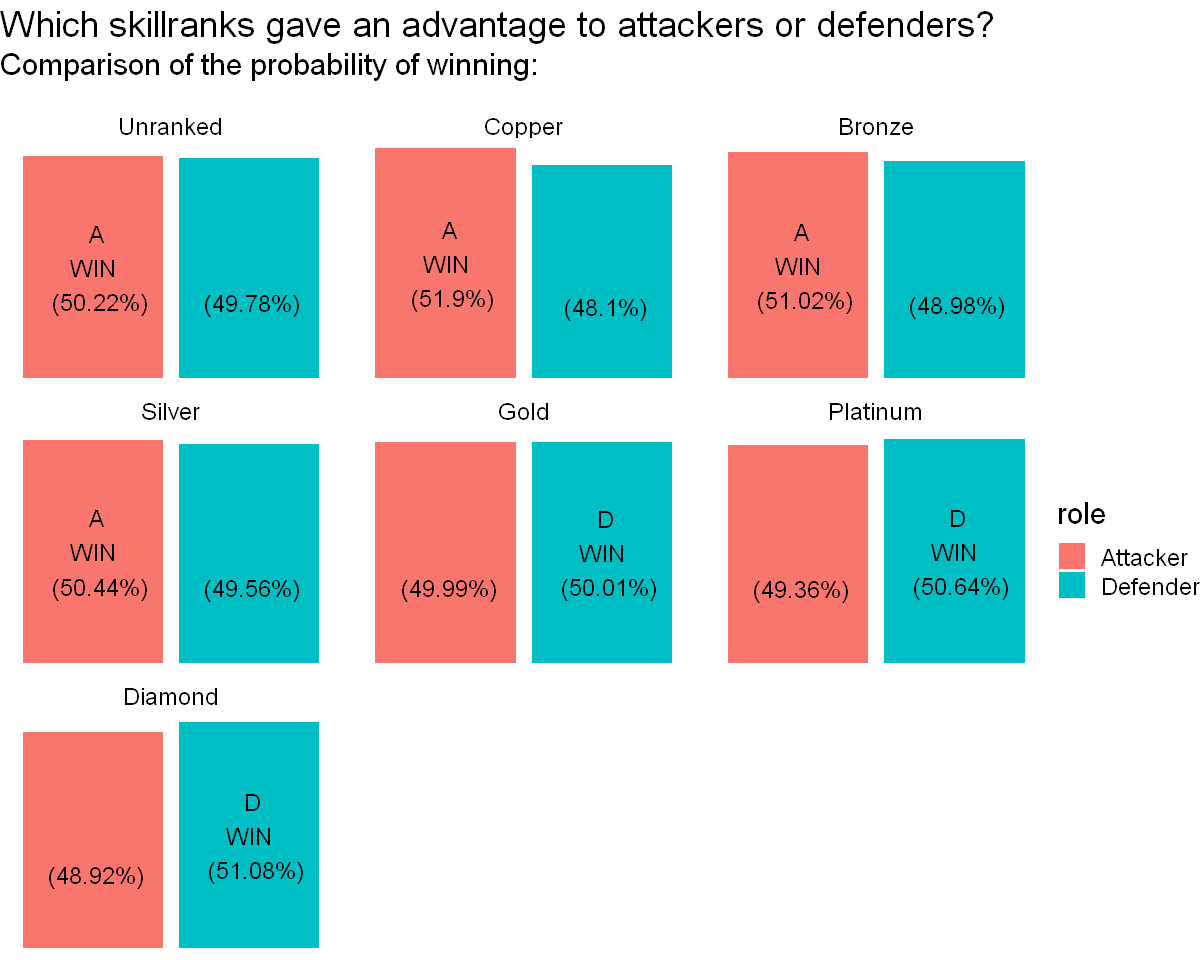

In [135]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(role, aes(x= role, y = chancetowin, fill = role)) +
  geom_col() +
  facet_wrap(~skillrank)+
  theme_void()+
  geom_text(aes(y = chancetowin/2, label = case_when(
    winner == "Attacker" & role == "Attacker" ~ paste0("  A \n WIN \n  (", chancetowin,"%)"),
    winner == "Defender" & role == "Defender" ~paste0("  D \n WIN \n  (", chancetowin,"%)"),
    winner == "Attacker" & role == "Defender" ~ paste0("\n \n (",chancetowin,"%)"),
    winner == "Defender" & role == "Attacker" ~paste0("\n \n (",chancetowin,"%)"))), 
    size = 5)+
  labs(title="Which skillranks gave an advantage to attackers or defenders?", subtitle="Comparison of the probability of winning: \n ")+
  theme(text = element_text(size = 18))  

Interpretation: The different skillranks do not offer the same probability of winning for attackers/defenders (but the difference is not so big).
Those that give the advantage to the attackers are the first four: Unranked, Copper, Bronze and Silver.
Those that give the advantage to the defenders are the last three: Gold, Platinum, Diamond.

This is interesting because the player has to pass all skillranks in order to reach the Diamond skillrank. This means that the player will first have an advantage when attacking for the first four skillranks and then he will have an advantage, not with attackers, but with defenders for the last four skillranks. In other words, the player will have to adapt to this change as he levels up.

We can conclude at this step that R6 Siege 2017 was not truly fair for attackers and defenders when we consider each skillrank. However, the game seems fairly balanced when we consider the overall experience of the game with its different levels.  


**To continue our analysis, we will take as an example the most played skillrank.**  
#### 2) What was the most played skillrank?  <a class="anchor" id="section_3_1_2"></a>

In [25]:
SR <- objectives %>% 
    group_by(skillrank) %>%
    summarise(totalgames = sum(nbwins))

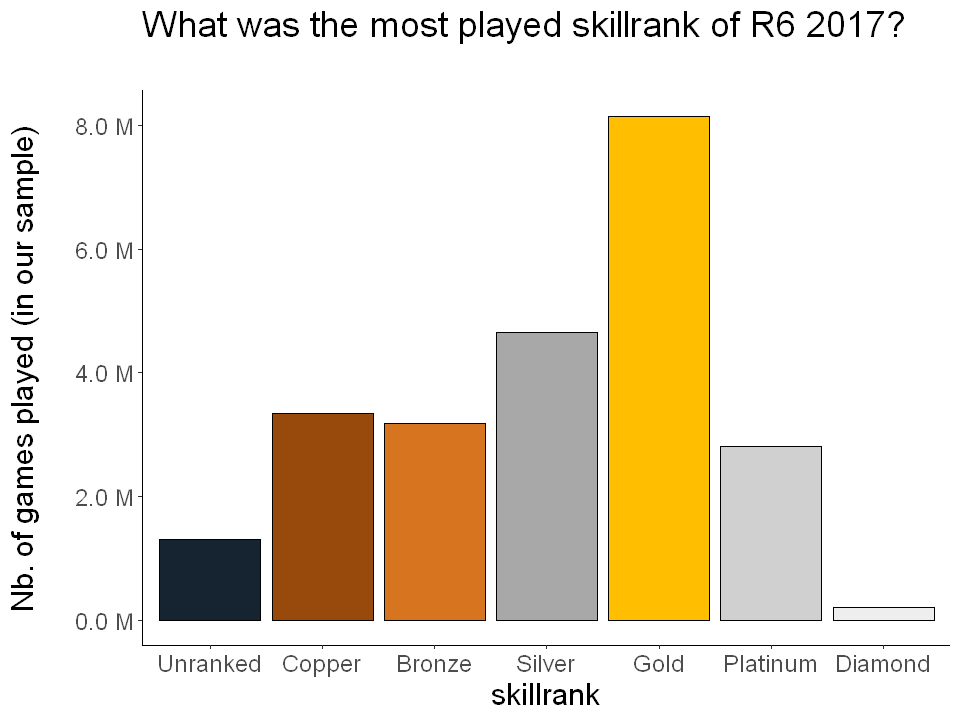

In [88]:
options(repr.plot.width=8, repr.plot.height=6)
paletteSR <- c( "#162431","#984a0c","#d77420","#a8a8a8","#ffbf00",  "#d0d0d0", "#eeeeee" )
ggplot(SR, aes(skillrank, totalgames, fill= skillrank))+
  geom_col(color = "black" )+
  scale_fill_manual(values=paletteSR)+
  theme_classic()+
  scale_y_continuous("Nb. of games played (in our sample)\n", labels = label_number(suffix = " M", scale = 1e-6))+
   theme(legend.position = "none")+
  labs(title="What was the most played skillrank of R6 2017?\n")+
  theme(text = element_text(size = 18)) 

Interpretation: Gold is the most played skillrank, so let's take it as example for our analysis.

### 2 - Maps: <a class="anchor" id="section_3_2"></a>

We saw that for the skillrank Gold, the attackers and defenders have almost the same probability to win with a little advantage for the defenders (50.01%). But is that true for all the maps?


#### 1) Was the probability of winning for the attackers and defenders the same for the different maps? (Skillrank: GOLD) <a class="anchor" id="section_3_2_1"></a>
**If not, which maps give an advantage to the attackers or defenders?**  

In [37]:
role_map <- objectives %>% 
    filter(skillrank == "Gold")%>%         
    group_by(skillrank,mapname, role) %>%
    summarise(totalwin = sum(nbwins))
  
  #From long to wide to calculate the nb. of games played and to defined who has the biggest probability to win.
  role_map<- role_map %>%  
    spread(key= role, value = totalwin)%>%
    mutate(totalgames = Attacker + Defender)%>%
    mutate(winner = ifelse(Attacker>Defender, "Attacker", "Defender"))
  #Let's calculate the probability to play each map
  role_map<- role_map %>% 
    mutate(chancetoplay = round((totalgames/sum(role_map$totalgames))*100,2))

   #From wide to long to continue the analysis
  role_map<- role_map %>%
    gather(key= "role", value = "totalwin", Attacker:Defender)%>%
    mutate(chancetowin = round((totalwin/totalgames)*100,2))
  
  #Let's clean and organize
  role_map <- select(role_map,role, mapname, winner,totalgames,chancetoplay, chancetowin )%>%
    group_by(skillrank,role, mapname)%>%
    arrange(role,mapname) 

`summarise()` has grouped output by 'skillrank', 'mapname'. You can override using the `.groups` argument.

Adding missing grouping variables: `skillrank`



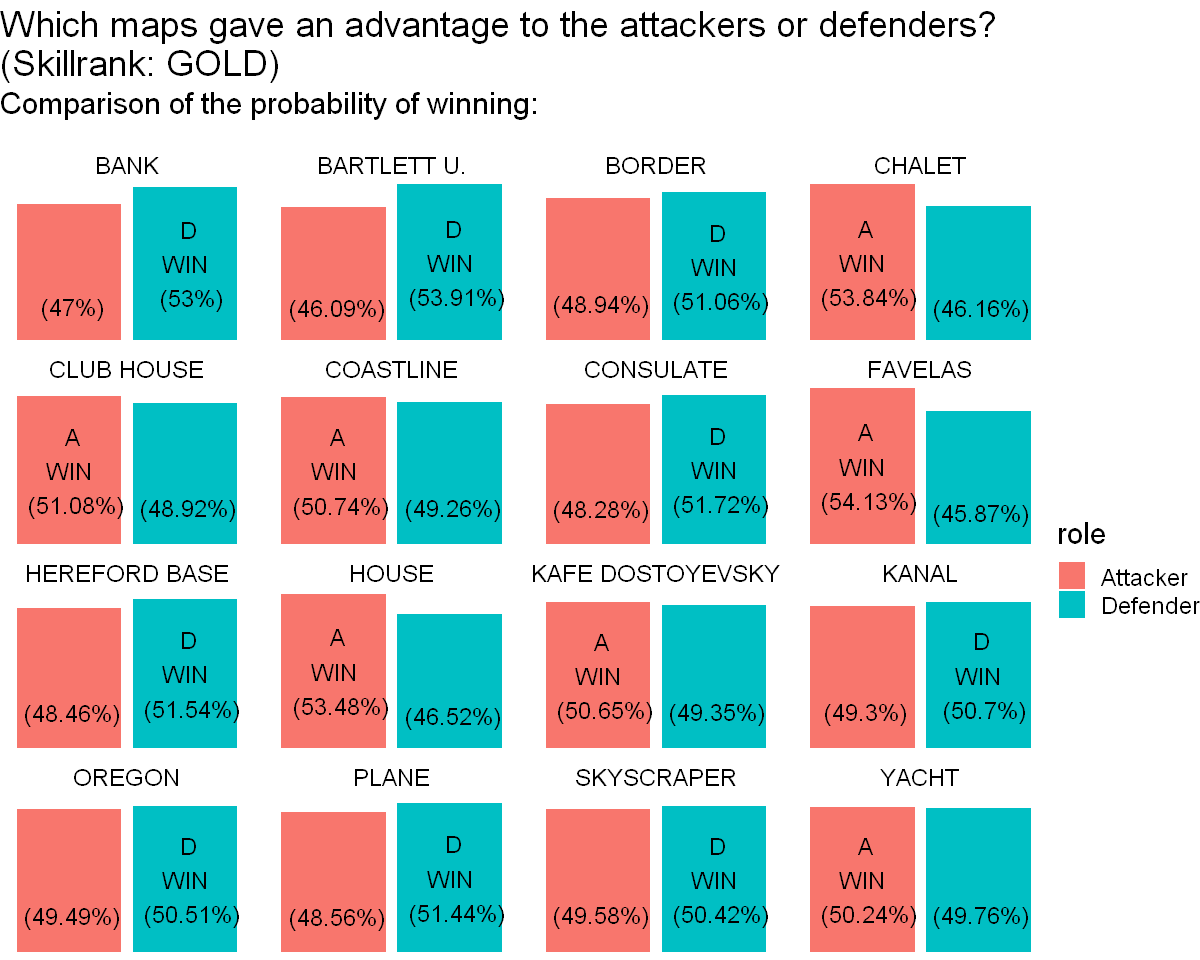

In [136]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(role_map, aes(x= role, y = chancetowin, fill = role)) +
  geom_col() +
  facet_wrap(~mapname)+
  theme_void()+
  geom_text(aes(y = chancetowin/2, label = case_when(
    winner == "Attacker" & role == "Attacker" ~ paste0("  A \n WIN \n  (", chancetowin,"%)"),
    winner == "Defender" & role == "Defender" ~paste0("  D \n WIN \n  (", chancetowin,"%)"),
    winner == "Attacker" & role == "Defender" ~ paste0("\n \n (",chancetowin,"%)"),
    winner == "Defender" & role == "Attacker" ~paste0("\n \n (",chancetowin,"%)"))), 
    size = 5)+
  labs(title="Which maps gave an advantage to the attackers or defenders? \n(Skillrank: GOLD)", subtitle="Comparison of the probability of winning: \n ")+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the different maps do not offer the same probability of winning for attackers/defenders. Some maps, such as CHALET, give a bigger probability of winning to attackers (54%). While others, such as BANK, give a bigger probability of winning to defenders (53%).

#### 2) Did the player have the same probability of playing the different maps? <a class="anchor" id="section_3_2_2"></a>

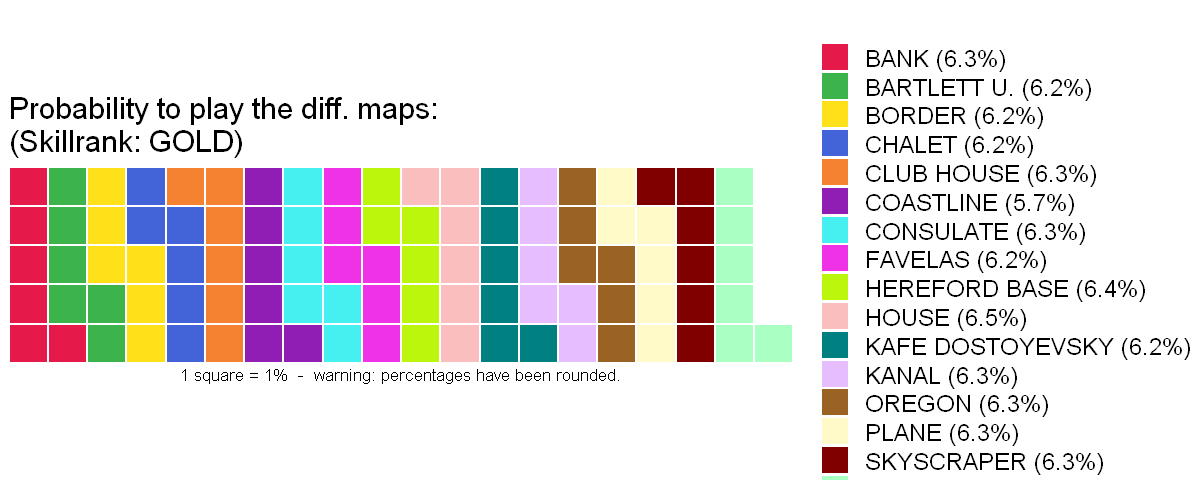

In [123]:
mapsATT <- role_map%>%
  filter(role == "Attacker")

nbgames_count <- round(mapsATT$chancetoplay)
names(nbgames_count) <- mapsATT$mapname
names(nbgames_count) <- paste0(names(nbgames_count)," (",round((mapsATT$totalgames/(sum(mapsATT$totalgames)))*100,1),"%)")

options(repr.plot.width=10, repr.plot.height=4)

waffle(nbgames_count, rows=5, size=0.6, colors=c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3'), 
       title="Probability to play the diff. maps: \n(Skillrank: GOLD)",
       xlab="1 square = 1%  -  warning: percentages have been rounded." )+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the player has almost the same probability to play the different maps (around 6% for all the maps. (Skillrank: GOLD)


#### 3) Which maps were the best for the attackers? <a class="anchor" id="section_3_2_3"></a>

In [47]:
mapsATT <- role_map%>%
  filter(role == "Attacker")

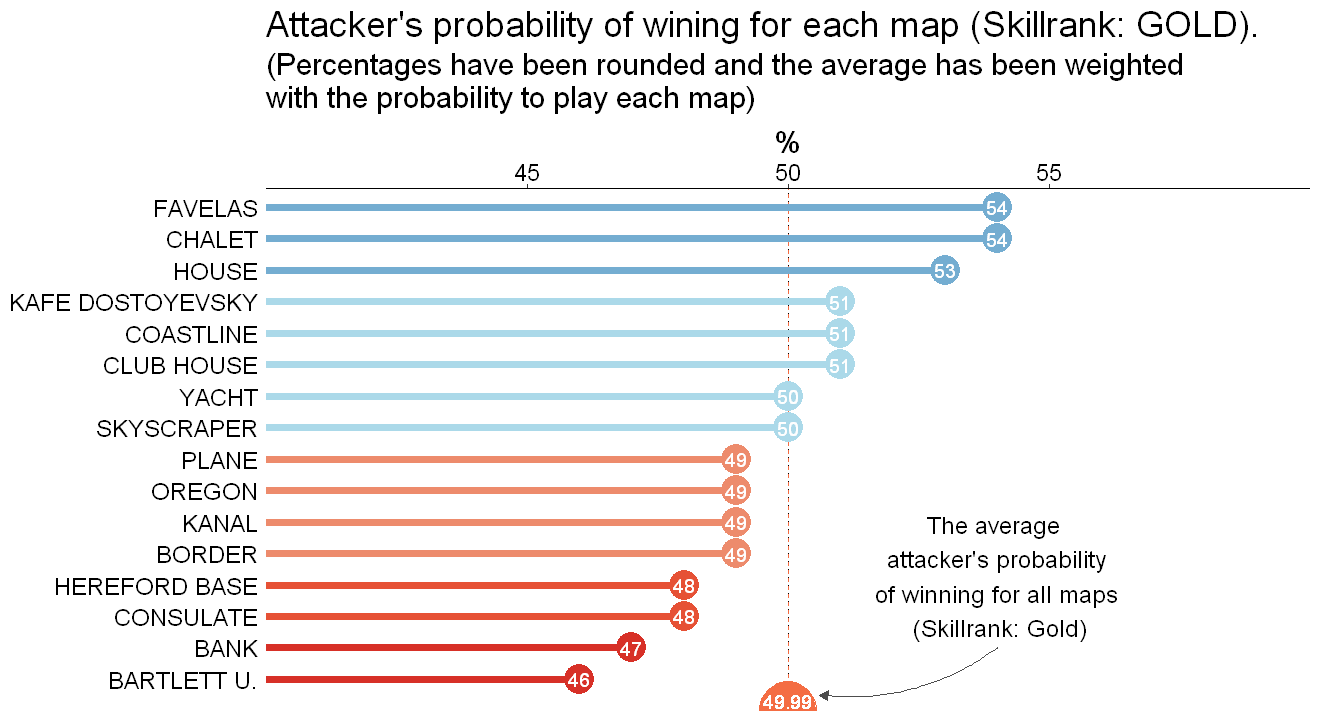

In [100]:
options(repr.plot.width=11, repr.plot.height=6)

paletteATTmaps <- c( "#d73027","#d73027","#f46d43","#abd9e9","#abd9e9",  "#74add1", "#74add1" )

ggplot(mapsATT, aes(x = round(chancetowin), y = reorder(mapname,round(chancetowin)) ,color = round(chancetowin)))+
  geom_vline(xintercept = 50, color = "black", linetype =3)+
  geom_vline(xintercept = weighted.mean(mapsATT$chancetowin,mapsATT$totalgames), color = "#f46d43", linetype =2)+
  geom_point(size=8)+
  geom_segment(aes(xend = 40, yend= mapname ), size =2)+
  scale_x_continuous("%", expand= c(0,0), limits = c(40,60), breaks = seq(45,55,5), position = "top" )+
  scale_color_gradientn(colors = paletteATTmaps)+
  geom_text(aes(label= round(chancetowin)), color = "white", size = 4)+
  labs(title = "Attacker's probability of wining for each map (Skillrank: GOLD).", subtitle = "(Percentages have been rounded and the average has been weighted \nwith the probability to play each map)")+
  theme_classic()+
  theme(
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_text(color = "black"),
    legend.position = "none")+
  annotate(
    "text",
    x = 54, y= 6.2,
    label = "The average \n attacker's probability \n of winning for all maps \n (Skillrank: Gold)",
    vjust = 1, size = 5, color = "black" )+
  annotate("curve",
    x=54, 
    y=2,
    xend = weighted.mean(mapsATT$chancetowin,mapsATT$totalgames)+0.6,
    yend = 0.5,
    arrow = arrow(length = unit(0.2, "cm"), type = "closed"),
    color = "grey30",
    curvature = -0.2) +
  geom_point(aes(x= weighted.mean(mapsATT$chancetowin,mapsATT$totalgames), y = 0), colour="#f46d43", size= 16)+
  geom_text(aes(x= weighted.mean(mapsATT$chancetowin,mapsATT$totalgames), y = 0.3, label= round(weighted.mean(mapsATT$chancetowin,mapsATT$totalgames),2)), color = "white", size = 4)+
  theme(text = element_text(size = 18)) 

Interpretation: 

We can see that the maps: HOUSE, KAFE D., COASTLINE and CLUB H. are the best for the attackers because they give them a probability of winning bigger than 50% (Skillrank: GOLD).

#### 4) Which maps were the best for the defenders?  <a class="anchor" id="section_3_2_4"></a>

In [65]:
mapsDEF <- role_map%>%
  filter(role == "Defender")

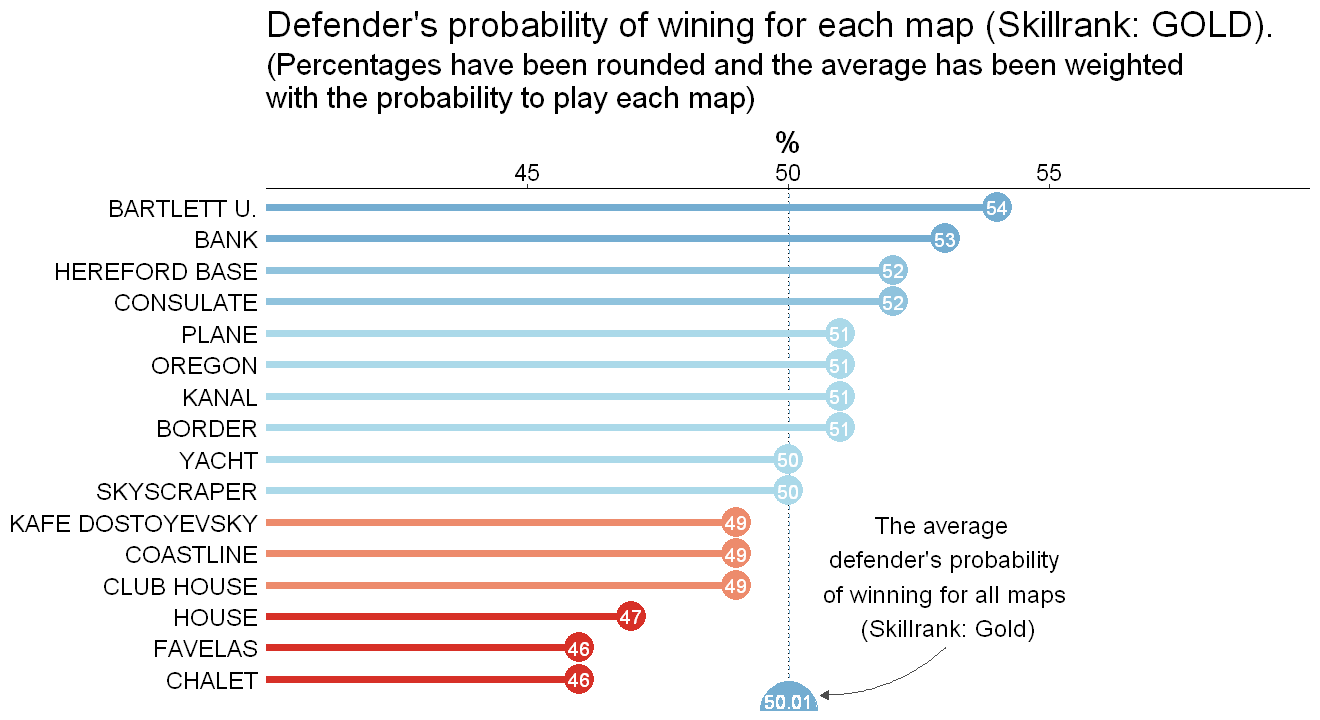

In [99]:
options(repr.plot.width=11, repr.plot.height=6)

paletteDEFmaps <- c( "#d73027","#d73027","#f46d43","#abd9e9","#abd9e9",  "#74add1", "#74add1" )

ggplot(mapsDEF, aes(x = round(chancetowin), y = reorder(mapname,round(chancetowin)) ,color = round(chancetowin)))+
  geom_vline(xintercept = 50, color = "black", linetype =3)+
  geom_vline(xintercept = weighted.mean(mapsDEF$chancetowin,mapsDEF$totalgames), color = "#74add1", linetype =2)+
  geom_point(size=8)+
  geom_segment(aes(xend = 40, yend= mapname ), size =2)+
  scale_x_continuous("%", expand= c(0,0), limits = c(40,60), breaks = seq(45,55,5), position = "top" )+
  scale_color_gradientn(colors = paletteDEFmaps)+
  geom_text(aes(label= round(chancetowin)), color = "white", size = 4)+
  labs(title = "Defender's probability of wining for each map (Skillrank: GOLD).", subtitle = "(Percentages have been rounded and the average has been weighted \nwith the probability to play each map)")+
  theme_classic()+
  theme(
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_text(color = "black"),
    legend.position = "none")+
  annotate(
    "text",
    x = 53, y= 6.2,
    label = "The average \n defender's probability \n of winning for all maps \n (Skillrank: Gold)",
    vjust = 1, size = 5, color = "black" )+
  annotate("curve",
    x=53, 
    y=2,
    xend = weighted.mean(mapsDEF$chancetowin,mapsDEF$totalgames)+0.6,
    yend = 0.5,
    arrow = arrow(length = unit(0.2, "cm"), type = "closed"),
    color = "grey30",
    curvature = -0.2) +
  geom_point(aes(x= weighted.mean(mapsDEF$chancetowin,mapsDEF$totalgames), y = 0), colour="#74add1", size= 16)+
  geom_text(aes(x= weighted.mean(mapsDEF$chancetowin,mapsDEF$totalgames), y = 0.3, label= round(weighted.mean(mapsDEF$chancetowin,mapsDEF$totalgames),2)), color = "white", size = 4)+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the maps: BARTLETT U.,BANK, HEREFOD B., CONSULATE, PLANE, OREGON, KANAL and BORDER are the best for the defenders because they give them a probability of winning bigger than 50% (Skillrank: GOLD).

### 3 - Game mode:  <a class="anchor" id="section_3_3"></a>


To continue our analysis, We will take the map: YACHT as an example.

We saw that for the map YACHT, the attackers and defenders have almost the same probability to win with a little advantage for the attackers (50.24%). But is that true for all the game modes?

#### 1) Was the probability of winning for the attackers and defenders the same for the different game modes? (Skillrank: GOLD. Map: YACHT) <a class="anchor" id="section_3_3_1"></a>
**If not, which game modes give an advantage to the attackers or defenders?**  

In [72]:
  role_map_gmode <- objectives %>% 
    filter(skillrank == "Gold", mapname == "YACHT")%>%         
    group_by(skillrank,mapname, gamemode, role) %>%
    summarise(totalwin = sum(nbwins))
   
  #From long to wide to calculate the nb. of games played and to defined who has the biggest probability to win.
  role_map_gmode<- role_map_gmode %>%  
    spread(key= role, value = totalwin)%>%
    mutate(totalgames = Attacker + Defender)%>%
    mutate(winner = ifelse(Attacker>Defender, "Attacker", "Defender"))
  #Let's calculate the probability to play each map
  role_map_gmode<- role_map_gmode %>% 
    mutate(chancetoplay = round((totalgames/sum(role_map_gmode$totalgames))*100,2))
  
   #From wide to long to continue the analysis
  role_map_gmode<- role_map_gmode %>%
    gather(key= "role", value = "totalwin", Attacker:Defender)%>%
    mutate(chancetowin = round((totalwin/totalgames)*100,2))
  
  #Let's clean and organize
  role_map_gmode <- select(role_map_gmode,role, mapname, gamemode, winner,totalgames,chancetoplay, chancetowin )%>%
    group_by(skillrank,role, mapname, gamemode)%>%
    arrange(role,mapname, gamemode) 

`summarise()` has grouped output by 'skillrank', 'mapname', 'gamemode'. You can override using the `.groups` argument.

Adding missing grouping variables: `skillrank`



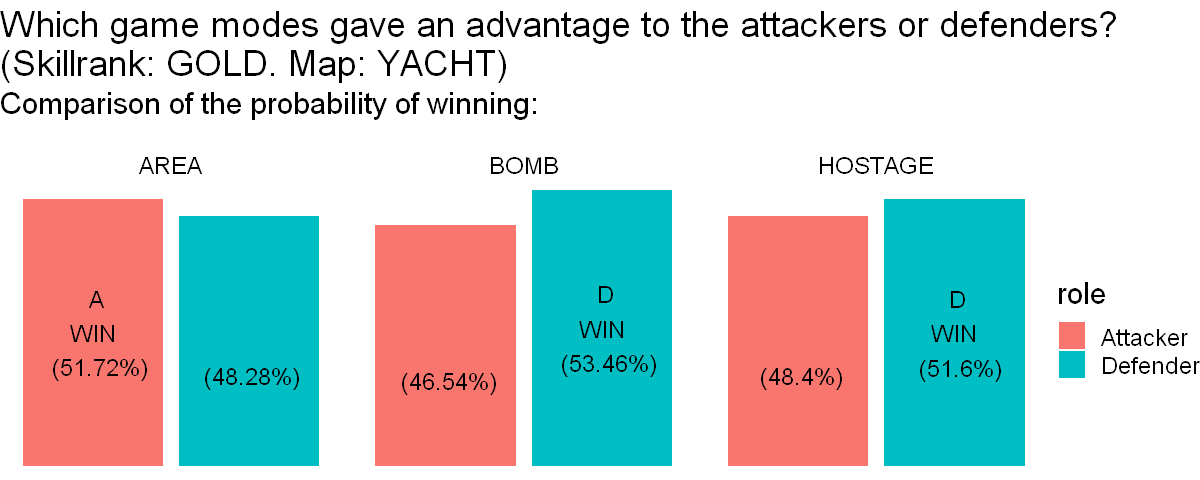

In [137]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(role_map_gmode, aes(x= role, y = chancetowin, fill = role)) +
  geom_col() +
  facet_wrap(~gamemode)+
  theme_void()+
  geom_text(aes(y = chancetowin/2, label = case_when(
    winner == "Attacker" & role == "Attacker" ~ paste0("  A \n WIN \n  (", chancetowin,"%)"),
    winner == "Defender" & role == "Defender" ~paste0("  D \n WIN \n  (", chancetowin,"%)"),
    winner == "Attacker" & role == "Defender" ~ paste0("\n \n (",chancetowin,"%)"),
    winner == "Defender" & role == "Attacker" ~paste0("\n \n (",chancetowin,"%)"))), 
    size = 5)+
  labs(title="Which game modes gave an advantage to the attackers or defenders? \n(Skillrank: GOLD. Map: YACHT)", subtitle="Comparison of the probability of winning: \n ")+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the different game modes do not give the same probability of winning for the attackers/defenders. Indeed, the game mode AREA is better for the attackers while BOMB and HOSTAGE are better for the defenders.


#### 2) Did the player have the same probability of playing the different game modes? <a class="anchor" id="section_3_3_2"></a>

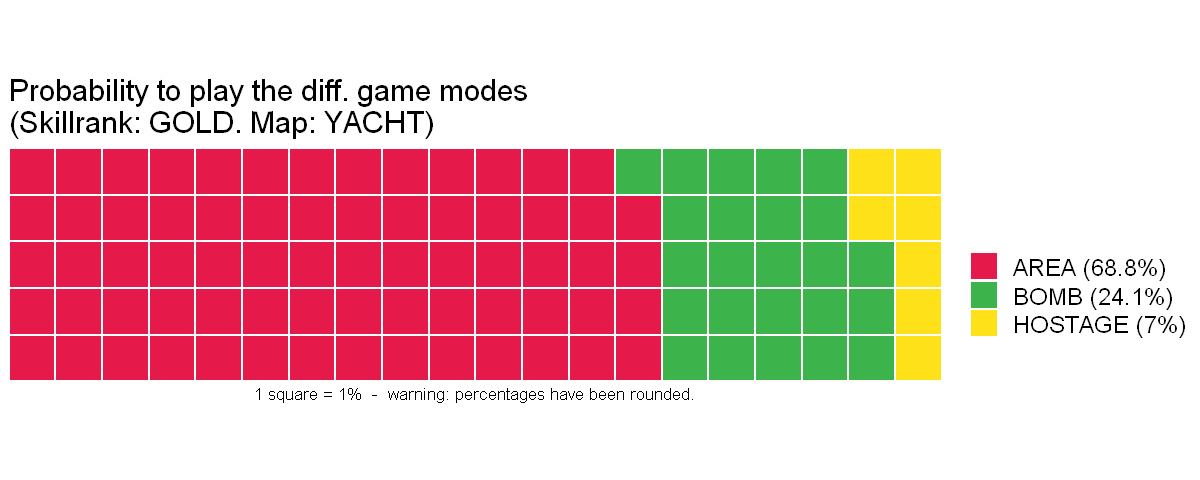

In [124]:
gmodeATT <- role_map_gmode%>%
  filter(role == "Attacker")

nbgames_count <- round(gmodeATT$chancetoplay)
names(nbgames_count) <- gmodeATT$gamemode
names(nbgames_count) <- paste0(names(nbgames_count)," (",round((gmodeATT$totalgames/(sum(gmodeATT$totalgames)))*100,1),"%)")

options(repr.plot.width=10, repr.plot.height=4)

waffle(nbgames_count, rows=5, size=0.6, colors=c('#e6194b', '#3cb44b', '#ffe119'), 
       title="Probability to play the diff. game modes \n(Skillrank: GOLD. Map: YACHT)",
       xlab="1 square = 1%  -  warning: percentages have been rounded." )+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the player has more probability to play the mode AREA (68.8%) than BOMB(24.1%) and even more than HOSTAGE (7%) in the map: YACHT (Skillrank: Gold).
This information shows the importance to weight the means, in the next charts, with the probability to play each modes.

#### 3) Which game modes were the best for the attackers?<a class="anchor" id="section_3_3_3"></a>

In [96]:
gmodeATT <- role_map_gmode%>%
  filter(role == "Attacker")

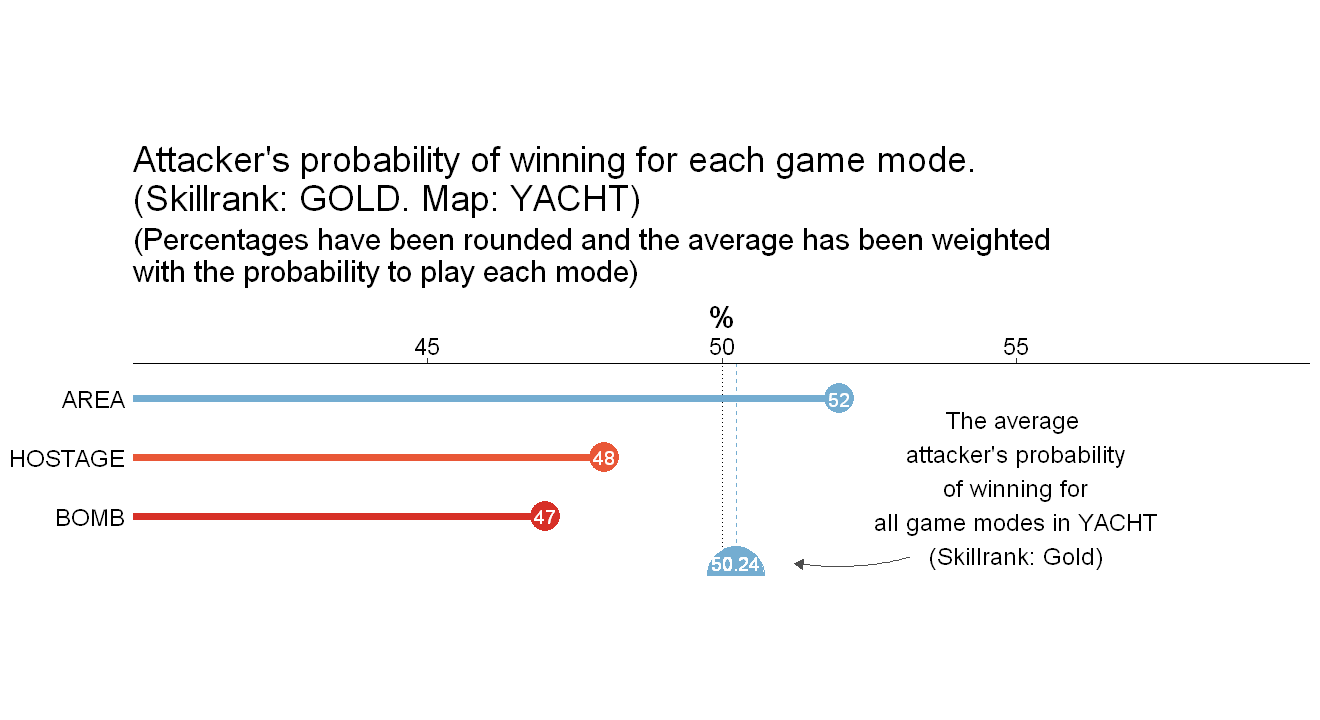

In [105]:
options(repr.plot.width=11, repr.plot.height=6)

paletteATTgmode <- c( "#d73027","#f46d43",  "#abd9e9", "#74add1" )

ggplot(gmodeATT, aes(x = round(chancetowin), y = reorder(gamemode,round(chancetowin)) ,color = round(chancetowin)))+
  geom_vline(xintercept = 50, color = "black", linetype =3)+
  geom_vline(xintercept = weighted.mean(gmodeATT$chancetowin,gmodeATT$totalgames), color = "#74add1", linetype =2)+
  geom_point(size=8)+
  geom_segment(aes(xend = 40, yend= gamemode ), size =2)+
  scale_x_continuous("%", expand= c(0,0), limits = c(40,60), breaks = seq(45,55,5), position = "top" )+
  scale_color_gradientn(colors = paletteATTgmode )+
  geom_text(aes(label= round(chancetowin)), color = "white", size = 4)+
  labs(title = "Attacker's probability of winning for each game mode. \n(Skillrank: GOLD. Map: YACHT)", subtitle = "(Percentages have been rounded and the average has been weighted \nwith the probability to play each mode)")+
  theme_classic()+
  theme(
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_text(color = "black"),
    legend.position = "none")+
  annotate(
    "text",
    x = 55, y= 2.8,
    label = "The average \n attacker's probability \n of winning for \n all game modes in YACHT \n(Skillrank: Gold)",
    vjust = 1, size = 5, color = "black" )+
  annotate("curve",
    x=53.2, 
    y=0.3,
    xend = weighted.mean(gmodeATT$chancetowin,gmodeATT$totalgames)+1,
    yend = 0.2,
    arrow = arrow(length = unit(0.2, "cm"), type = "closed"),
    color = "grey30",
    curvature = -0.1) +
  geom_point(aes(x= weighted.mean(gmodeATT$chancetowin,gmodeATT$totalgames), y = 0), colour="#74add1", size= 16)+
  geom_text(aes(x= weighted.mean(gmodeATT$chancetowin,gmodeATT$totalgames), y = 0.2, label= round(weighted.mean(gmodeATT$chancetowin,gmodeATT$totalgames), 2)), color = "white", size = 4)+
  coord_fixed(ratio = 1)+
  theme(text = element_text(size = 18)) 

Interpretation: As we saw before, the game mode AREA is the only mode in YACHT that give a good probability of winning to the attackers (52%). Nevertheless, because AREA is also the mode with the biggest probability to be played (68.8%), the average attacker's probability to win for all the modes is quite good (50.24%).

#### 4) Which game modes were the best for the defenders? <a class="anchor" id="section_3_3_4"></a>

In [106]:
gmodeDEF <- role_map_gmode%>%
  filter(role == "Defender")

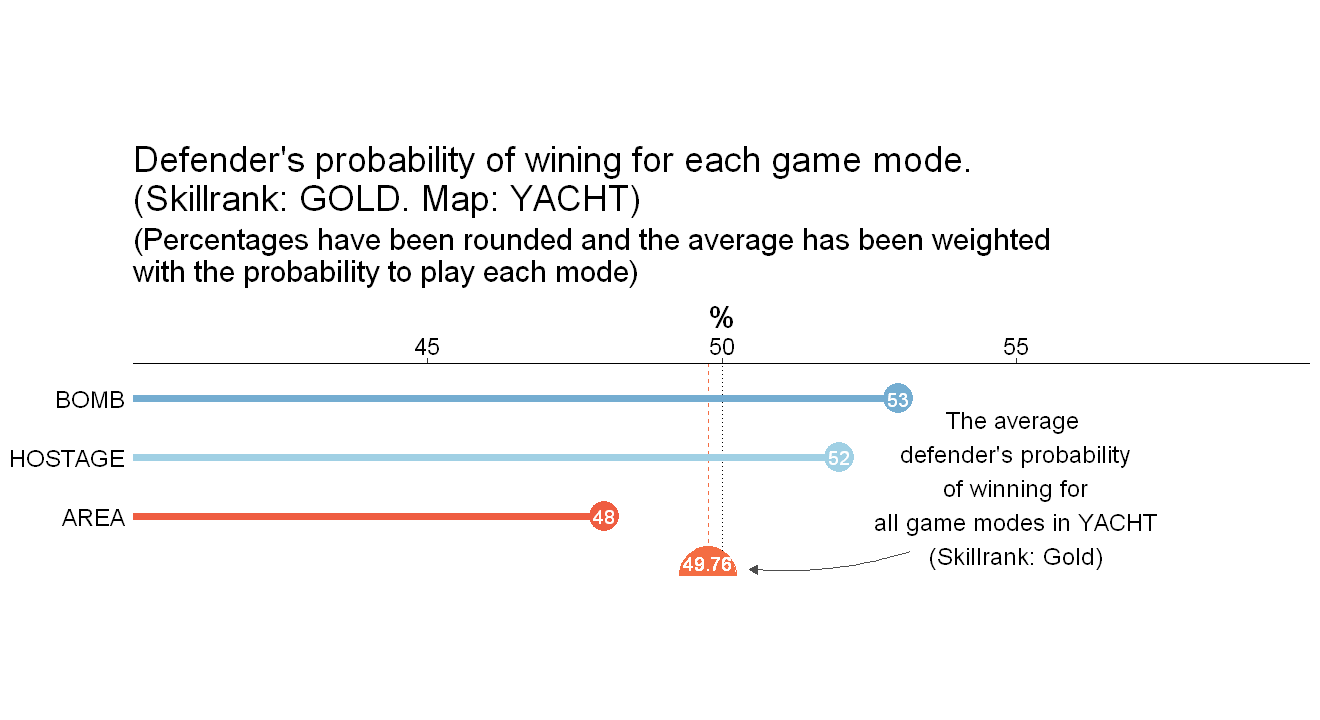

In [117]:
options(repr.plot.width=11, repr.plot.height=6)

paletteDEFgmode <- c( "#ef5d41" ,  "#abd9e9","#abd9e9","#abd9e9", "#74add1" )

ggplot(gmodeDEF, aes(x = round(chancetowin), y = reorder(gamemode,round(chancetowin)) ,color = round(chancetowin)))+
  geom_vline(xintercept = 50, color = "black", linetype =3)+
  geom_vline(xintercept = weighted.mean(gmodeDEF$chancetowin,gmodeDEF$totalgames), color = "#f46d43", linetype =2)+
  geom_point(size=8)+
  geom_segment(aes(xend = 40, yend= gamemode ), size =2)+
  scale_x_continuous("%", expand= c(0,0), limits = c(40,60), breaks = seq(45,55,5), position = "top" )+
  scale_color_gradientn(colors = paletteDEFgmode)+
  geom_text(aes(label= round(chancetowin)), color = "white", size = 4)+
  labs(title = "Defender's probability of wining for each game mode. \n(Skillrank: GOLD. Map: YACHT)", subtitle = "(Percentages have been rounded and the average has been weighted \nwith the probability to play each mode)")+
  theme_classic()+
  theme(
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_text(color = "black"),
    legend.position = "none")+
  annotate(
    "text",
    x = 55, y= 2.8,
    label = "The average \n defender's probability \n of winning for \n all game modes in YACHT \n(Skillrank: Gold)",
    vjust = 1, size = 5, color = "black" )+
  annotate("curve",
    x=53.2, 
    y=0.4,
    xend = weighted.mean(gmodeDEF$chancetowin,gmodeDEF$totalgames)+0.7,
    yend = 0.1,
    arrow = arrow(length = unit(0.2, "cm"), type = "closed"),
    color = "grey30",
    curvature = -0.1) +
  geom_point(aes(x= weighted.mean(gmodeDEF$chancetowin,gmodeDEF$totalgames), y = 0), colour="#f46d43", size= 16)+
  geom_text(aes(x= weighted.mean(gmodeDEF$chancetowin,gmodeDEF$totalgames), y = 0.2, label= round(weighted.mean(gmodeDEF$chancetowin,gmodeDEF$totalgames), 2)), color = "white", size = 4)+
  coord_fixed(ratio = 1)+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the game modes: BOMB and HOSTAGE are the best for the defenders because they give them a probability of winning bigger than 50% in YACHT (Skillrank: GOLD). However, the probabilities to play BOMB (24.1%) or HOSTAGE (7%) in YACHT (skillrank: GOLD) are small compared to AREA (68.8%). That is why the average defender's probability of winning fo all the modes is less than 50%.

### 4 - Objective location:  <a class="anchor" id="section_3_4"></a>

Still on the map: YACHT, we will take the game mode AREA, the one that has the most probability to be played (68.8%), as an example to continue our analysis.
For this game mode: AREA, the attackers have a good probability of winning (51.72%). But does that change depending of the objective location ?

#### 1) Was the probability of winning for the attackers and defenders the same for the different objective locations? (Skillrank: GOLD. Map: YACHT. Game mode: AREA.)  <a class="anchor" id="section_3_4_1"></a>
**If not, which objective locations give an advantage to the attackers or defenders?**  

In [118]:
  role_map_gmode_objloc <- objectives %>% 
    filter(skillrank == "Gold", mapname == "YACHT", gamemode == "AREA")%>%         
    group_by(skillrank,mapname, gamemode, objectivelocation, role) %>%
    summarise(totalwin = sum(nbwins))
   
  #From long to wide to calculate the nb. of games played and to defined who win the most
  role_map_gmode_objloc<- role_map_gmode_objloc %>%  
    spread(key= role, value = totalwin)%>%
    mutate(totalgames = Attacker + Defender)%>%
    mutate(winner = ifelse(Attacker>Defender, "Attacker", "Defender"))
  #Let's calculate the probability to play each map
  role_map_gmode_objloc<- role_map_gmode_objloc %>% 
    mutate(chancetoplay = round((totalgames/sum(role_map_gmode_objloc$totalgames))*100,2))
  
   #From wide to long to continue the analysis
  role_map_gmode_objloc<- role_map_gmode_objloc %>%
    gather(key= "role", value = "totalwin", Attacker:Defender)%>%
    mutate(chancetowin = round((totalwin/totalgames)*100,2))
  
  #Let's clean and organize
  role_map_gmode_objloc <- select(role_map_gmode_objloc,role, mapname, gamemode, objectivelocation, winner,totalgames,chancetoplay, chancetowin )%>%
    group_by(skillrank,role, mapname, gamemode, objectivelocation)%>%
    arrange(role,mapname, gamemode,objectivelocation) 

`summarise()` has grouped output by 'skillrank', 'mapname', 'gamemode', 'objectivelocation'. You can override using the `.groups` argument.

Adding missing grouping variables: `skillrank`



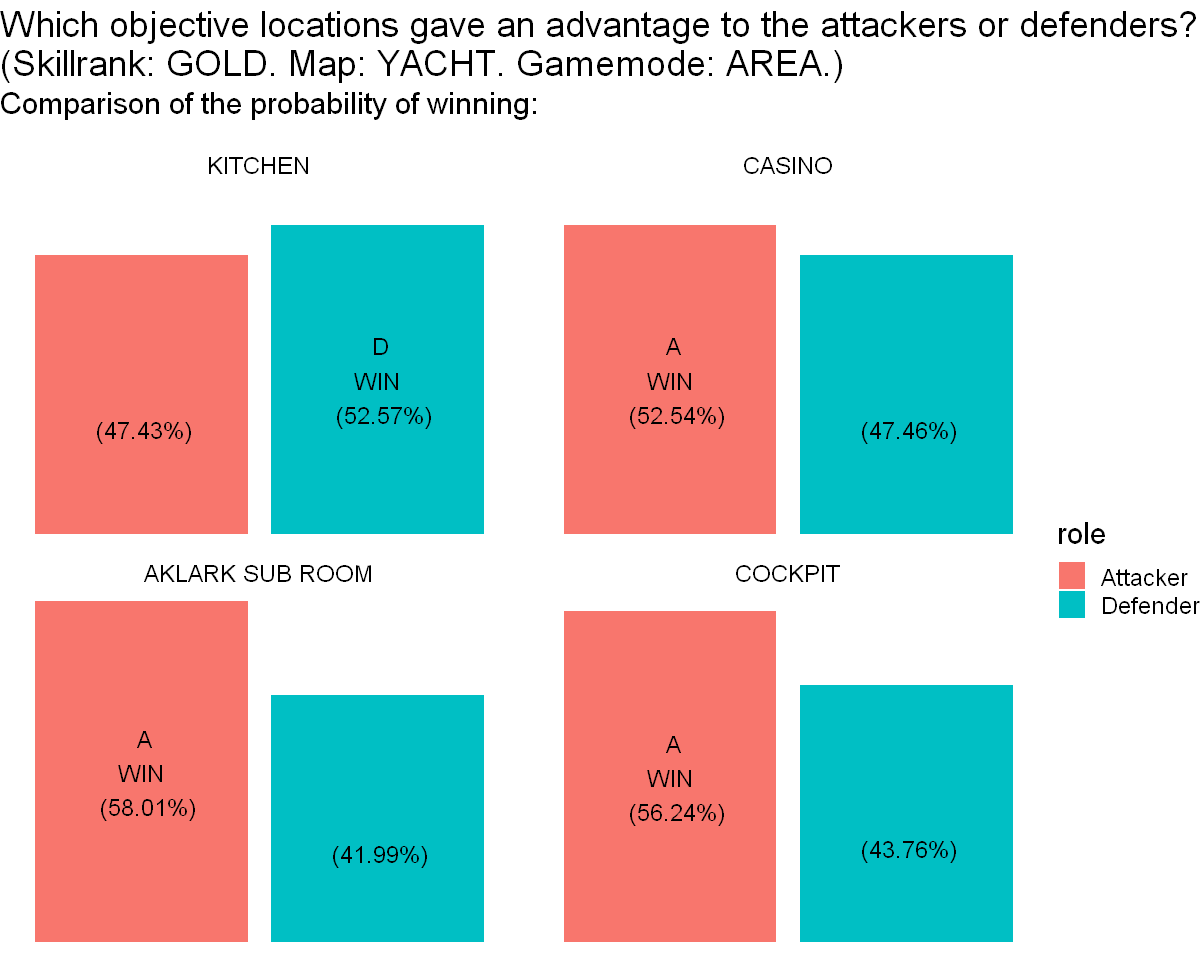

In [138]:
options(repr.plot.width=10, repr.plot.height=8)

ggplot(role_map_gmode_objloc, aes(x= role, y = chancetowin, fill = role)) +
  geom_col() +
  facet_wrap(~objectivelocation)+
  theme_void()+
  geom_text(aes(y = chancetowin/2, label = case_when(
    winner == "Attacker" & role == "Attacker" ~ paste0("  A \n WIN \n  (", chancetowin,"%)"),
    winner == "Defender" & role == "Defender" ~paste0("  D \n WIN \n  (", chancetowin,"%)"),
    winner == "Attacker" & role == "Defender" ~ paste0("\n \n (",chancetowin,"%)"),
    winner == "Defender" & role == "Attacker" ~paste0("\n \n (",chancetowin,"%)"))), 
    size = 5)+
  labs(title="Which objective locations gave an advantage to the attackers or defenders? \n(Skillrank: GOLD. Map: YACHT. Gamemode: AREA.)", subtitle="Comparison of the probability of winning: \n ")+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the different objective locations do not give the same probability of winning for the attackers/defenders. Indeed, KITCHEN is the best for the defenders and the others for the the attackers.

#### 2) Did the player have the same probability of playing the different objective locations?<a class="anchor" id="section_3_4_2"></a>

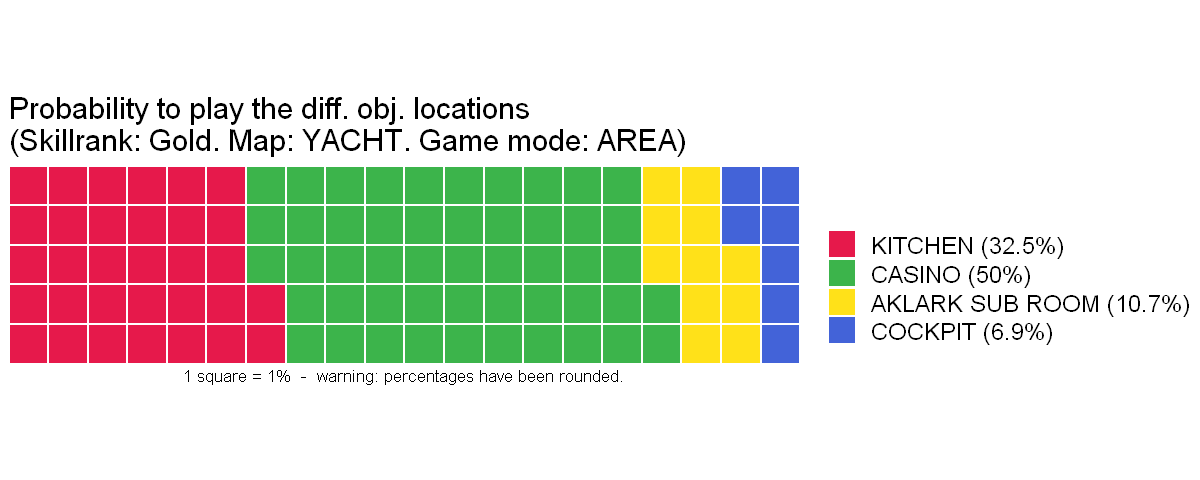

In [125]:
objlocATT <- role_map_gmode_objloc%>%
  filter(role == "Attacker")

nbgames_count <- round(objlocATT$chancetoplay)
names(nbgames_count) <- objlocATT$objectivelocation
names(nbgames_count) <- paste0(names(nbgames_count)," (",round((objlocATT$totalgames/(sum(objlocATT$totalgames)))*100,1),"%)")

options(repr.plot.width=10, repr.plot.height=4)

waffle(nbgames_count, rows=5, size=0.6, colors=c('#e6194b', '#3cb44b', '#ffe119','#4363d8'), 
       title="Probability to play the diff. obj. locations \n(Skillrank: Gold. Map: YACHT. Game mode: AREA)",
       xlab="1 square = 1%  -  warning: percentages have been rounded." )+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the player has more probability to play the mode AREA with the objective location: CASINO (50%), followed by KITCHEN (32.5%), AKLARK SUB ROOM (10.7%) and then COCKPIT(6.9%) in the map YACHT (Skillrank: Gold).
This information shows the importance to weight the means, in the next charts, with the probability to play each modes.


#### 3) Which objective locations were the best for the attackers? <a class="anchor" id="section_3_4_3"></a>

In [126]:
objlocATT <- role_map_gmode_objloc%>%
  filter(role == "Attacker")

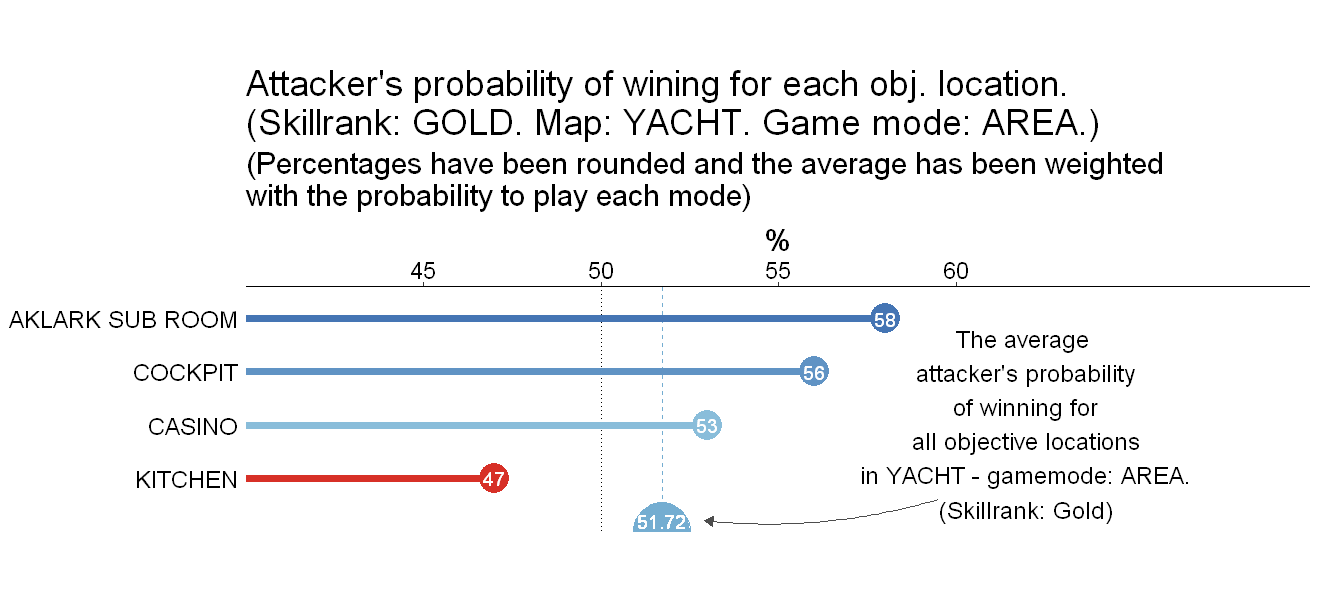

In [132]:
options(repr.plot.width=11, repr.plot.height=5)

paletteATTobjloc <- c( "#d73027",  "#abd9e9", "#74add1", "#4575b4" )

ggplot(objlocATT, aes(x = round(chancetowin), y = reorder(objectivelocation,round(chancetowin)) ,color = round(chancetowin)))+
  geom_vline(xintercept = 50, color = "black", linetype =3)+
  geom_vline(xintercept = weighted.mean(objlocATT$chancetowin,objlocATT$totalgames), color = "#74add1", linetype =2)+
  geom_point(size=8)+
  geom_segment(aes(xend = 40, yend= objectivelocation ), size =2)+
  scale_x_continuous("%", expand= c(0,0), limits = c(40,70), breaks = seq(45,60,5), position = "top" )+
  scale_color_gradientn(colors = paletteATTobjloc )+
  geom_text(aes(label= round(chancetowin)), color = "white", size = 4)+
  labs(title = "Attacker's probability of wining for each obj. location. \n(Skillrank: GOLD. Map: YACHT. Game mode: AREA.)", subtitle = "(Percentages have been rounded and the average has been weighted \nwith the probability to play each mode)")+
  theme_classic()+
  theme(
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_text(color = "black"),
    legend.position = "none")+
  annotate(
    "text",
    x = 62, y= 3.8,
    label = "The average \n attacker's probability \n of winning for \n all objective locations \n in YACHT - gamemode: AREA. \n(Skillrank: Gold)",
    vjust = 1, size = 5, color = "black" )+
  annotate("curve",
    x=59.5, 
    y=0.6,
    xend = weighted.mean(objlocATT$chancetowin,objlocATT$totalgames)+1.2,
    yend = 0.2,
    arrow = arrow(length = unit(0.2, "cm"), type = "closed"),
    color = "grey30",
    curvature = -0.1) +
  geom_point(aes(x= weighted.mean(objlocATT$chancetowin,objlocATT$totalgames), y = 0), colour="#74add1", size= 16)+
  geom_text(aes(x= weighted.mean(objlocATT$chancetowin,objlocATT$totalgames), y = 0.2, label= round(weighted.mean(objlocATT$chancetowin,objlocATT$totalgames), 2)), color = "white", size = 4)+
  coord_fixed(ratio = 1.5)+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the objective locations: AKLARK SUB ROOM, COCKPIT and CASINO give a good probability of winning to the attackers (respectively: 58%, 56% and 52%). Moreover, CASINO is the obj. location with the biggest probability tobe played (50%) this is also why the average attacker's probability of winning for all the obj. locations is good (51.72%).


#### 4) Which objective locations were the best for the defenders?<a class="anchor" id="section_3_4_4"></a>

In [133]:
objlocDEF <- role_map_gmode_objloc%>%
  filter(role == "Defender")

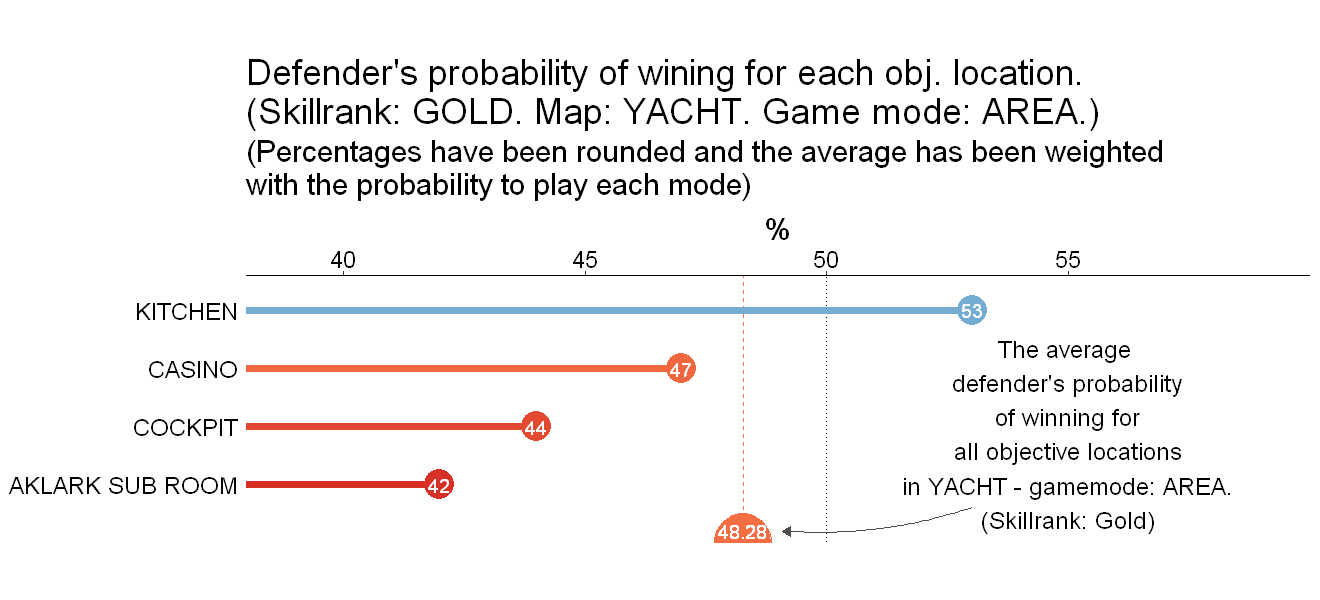

In [134]:
options(repr.plot.width=11, repr.plot.height=5)

paletteDEFobjloc <- c( "#d73027","#f46d43",  "#74add1"  )

ggplot(objlocDEF, aes(x = round(chancetowin), y = reorder(objectivelocation,round(chancetowin)) ,color = round(chancetowin)))+
  geom_vline(xintercept = 50, color = "black", linetype =3)+
  geom_vline(xintercept = weighted.mean(objlocDEF$chancetowin,objlocDEF$totalgames), color = "#f46d43", linetype =2)+
  geom_point(size=8)+
  geom_segment(aes(xend = 38, yend= objectivelocation ), size =2)+
  scale_x_continuous("%", expand= c(0,0), limits = c(38,60), breaks = seq(40,55,5), position = "top" )+
  scale_color_gradientn(colors = paletteDEFobjloc )+
  geom_text(aes(label= round(chancetowin)), color = "white", size = 4)+
  labs(title = "Defender's probability of wining for each obj. location. \n(Skillrank: GOLD. Map: YACHT. Game mode: AREA.)", subtitle = "(Percentages have been rounded and the average has been weighted \nwith the probability to play each mode)")+
  theme_classic()+
  theme(
    axis.line.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.title.y = element_blank(),
    axis.text = element_text(color = "black"),
    legend.position = "none")+
  annotate(
    "text",
    x = 55, y= 3.5,
    label = "The average \n defender's probability \n of winning for \n all objective locations \n in YACHT - gamemode: AREA. \n(Skillrank: Gold)",
    vjust = 1, size = 5, color = "black" )+
  annotate("curve",
    x=53, 
    y=0.6,
    xend = weighted.mean(objlocDEF$chancetowin,objlocDEF$totalgames)+0.8,
    yend = 0.2,
    arrow = arrow(length = unit(0.2, "cm"), type = "closed"),
    color = "grey30",
    curvature = -0.1) +
  geom_point(aes(x= weighted.mean(objlocDEF$chancetowin,objlocDEF$totalgames), y = 0), colour="#f46d43", size= 16)+
  geom_text(aes(x= weighted.mean(objlocDEF$chancetowin,objlocDEF$totalgames), y = 0.2, label= round(weighted.mean(objlocDEF$chancetowin,objlocDEF$totalgames), 2)), color = "white", size = 4)+
  coord_fixed(ratio = 1.2)+
  theme(text = element_text(size = 18)) 

Interpretation: We can see that the only objective location that is good for the defenders is KITCHEN because it give them a probability of winning bigger than 50%for the mode AREA in YACHT  (Skillrank: GOLD). Although KITCHEN has a good probabilities to be played (32.5%), the average defender's probability of winning fo all the modes is less than 50%.

--------------------------------------------------

## Conclusion <a class="anchor" id="chapter4"></a>

1) As said before, the overall game of R6 (2017) is not really fair for attackers and defenders. Indeed, they do not have the same probability of winning (but the difference is not big). However, it is well balanced. Indeed, when the player will level up and pass the skill ranks, he will first have a small advantage with the attackers (until GOLD) and then (after GOLD) he will have a small advantage with the defenders. 

2) The R6 (2017) player can play in different game configurations (different maps, game modes and objective locations). These configurations do not offer the same probability of winning for attackers and defenders. Some of them give an advantage to the attackers, while others to the defenders. This makes the game not really fair when considering just one configuration, however, some configurations have more probability of being played than others and this balances the overall fairness of R6.